Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression 
from scipy import optimize
import imageio
import os
#import numdifftools as nd
from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# function to calculate polynomial regression
def polynomialRegression(X,y):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    theta = lin_reg.coef_
    theta[0] = lin_reg.intercept_
    return theta

def driverFunction(p,x,y,df_ans):
    X = [x**(i) for i in range(p+1)]
    X = np.array(X).reshape(p+1, y.shape[0]).transpose()
    
    ans_LR = polynomialRegression(X,y)
    df_ans.append(ans_LR)
    y_hat_LR.append(np.matmul(X,np.transpose(ans_LR)))
    print(f'RMSE for p={p} Linear Regression: {np.sqrt(mse(y,y_hat_LR[-1]))}')
  
    plt.plot(x,np.abs(y-y_hat_LR[-1]),'r--')
    plt.grid()
    plt.xlabel('x',fontsize=12)
    plt.ylabel('|y - y_hat|',fontsize=12)
    plt.title(f'Polynomial Regression p = {p}',fontsize=12)
    plt.show()

In [3]:
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
theta0 = np.random.randn()
real_theta = [(-1 + theta0)*1e5, -300, 8, -100, 3, 1]
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + theta0*1e5

df_ans = []; y_hat_NE = []; y_hat_LR= []
df_ans.append([i for i in range(6)])
df_ans.append(real_theta)

RMSE for p=4 Linear Regression: 3922.723748085212


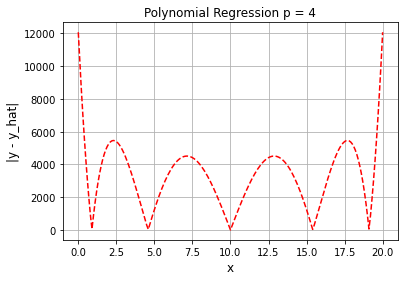

In [4]:
driverFunction(4,x,y,df_ans)

RMSE for p=5 Linear Regression: 9.274475585343036e-09


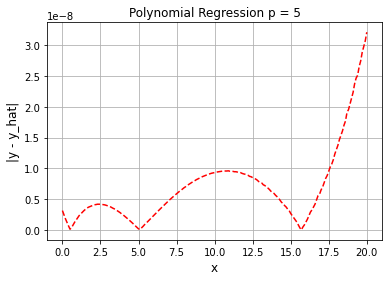

In [5]:
driverFunction(5,x,y,df_ans)

In [6]:
ans = pd.DataFrame(df_ans).T
ans.columns= ['Degree','Real θ','LR p=4','LR p=5']
ans

Degree        Real θ        LR p=4        LR p=5
0     0.0  76405.234597  88479.758597  76405.234597
1     1.0   -300.000000 -19066.341289   -300.000000
2     2.0      8.000000   6641.833333      8.000000
3     3.0   -100.000000   -987.794444   -100.000000
4     4.0      3.000000     53.000000      3.000000
5     5.0      1.000000           NaN      1.000000

Question 2

A

Minimum value of L(θ) is 0  at θ =  0


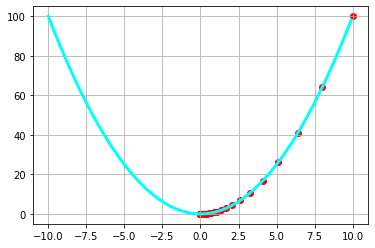

Minimum value of L(θ) is 0  at θ =  0


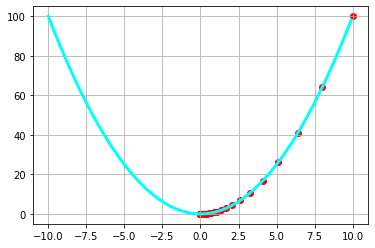

Minimum value of L(θ) is 2  at θ =  1


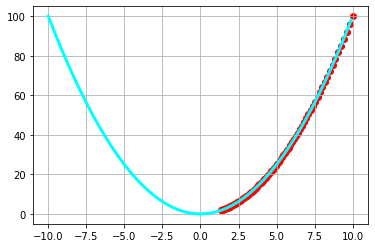

Minimum value of L(θ) is 0  at θ =  0


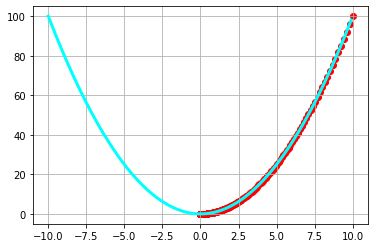

In [7]:
def L(theta):
    return theta*theta

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot = [startingVal]    
    for i in range(iterations - 1):
        gradientPlot.append(gradientPlot[-1] - alpha*2*gradientPlot[-1]);
    gradientPlot = np.asarray(gradientPlot)
    return gradientPlot

def driverFunc(alpha,iterations):
    theta = np.arange(-10,10,0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iterPlot = gradientDescent(iterations,alpha,10)
    print('Minimum value of L(θ) is', L(iterPlot[-1]), ' at θ = ', iterPlot[-1])
    plt.figure()
    plt.plot(theta, L_theta, 'cyan', linewidth=3)
    plt.scatter(iterPlot,L(iterPlot),c='red')
    plt.grid()
    plt.show()

driverFunc(0.1,50)
driverFunc(0.1,100)
driverFunc(0.01,100)
driverFunc(0.01,1000)

B

In [10]:
def L(theta1, theta2):
    return theta1*theta1 + theta2*theta2

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*2*gradientPlot1[-1])
        gradientPlot2.append(gradientPlot2[-1] - alpha*2*gradientPlot2[-1])

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):
    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    ans1,ans2  = gradientDescent(iterations,alpha,10)

    print('Minimum value of L(θ1, θ2) is', L(ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(0.1,100)
driverFunc(0.01,100)
driverFunc(0.01,1000)

Minimum value of L(θ1, θ2) is 1.2967236152753122e-17  at θ1 =  2.5462949704181095e-09  at θ2 =  2.5462949704181095e-09
Minimum value of L(θ1, θ2) is 3.6626294472556364  at θ1 =  1.353260774436257  at θ2 =  1.353260774436257
Minimum value of L(θ1, θ2) is 5.898332206277541e-16  at θ1 =  1.7173136298122048e-08  at θ2 =  1.7173136298122048e-08


C

Minimum value of L(θ) is 0  at θ =  1


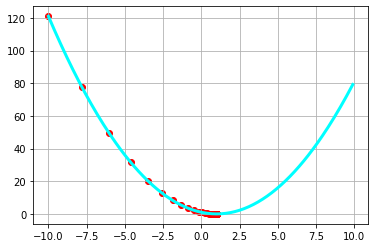

Minimum value of L(θ) is 0  at θ =  1


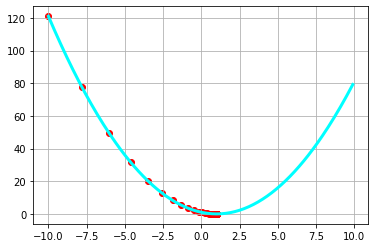

Minimum value of L(θ) is 0  at θ =  1


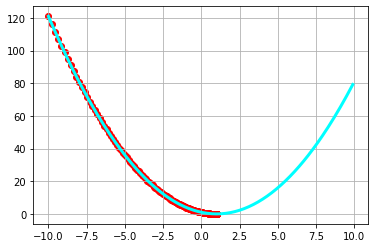

In [9]:
def L(theta):
    return (theta-1)**2


def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot = [startingVal]    
    for i in range(iterations - 1):
        gradientPlot.append(gradientPlot[-1] - alpha*2*(gradientPlot[-1]-1))
    gradientPlot = np.asarray(gradientPlot)
    return gradientPlot

def driverFunc(alpha,iterations):
    theta = np.arange(-10,10,0.1)
    L_theta = []
    for t in theta:
        L_theta.append(L(t))

    iterPlot = gradientDescent(iterations,alpha,-10)
    print('Minimum value of L(θ) is', L(iterPlot[-1]), ' at θ = ', iterPlot[-1])
    plt.figure()
    plt.plot(theta, L_theta, 'cyan', linewidth=3)
    plt.scatter(iterPlot,L(iterPlot),c='red')
    plt.grid()
    plt.show()

driverFunc(0.1,50)
driverFunc(0.1,100)
driverFunc(0.01,1000)

D

In [12]:
def L(theta1, theta2):
    return 2*((theta1-1)**2 + (theta2-1)**2)

def gradientDescent(iterations,alpha,startingVal):
    
    gradientPlot1 = [startingVal]
    gradientPlot2 = [startingVal]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[-1] - alpha*4*(gradientPlot1[-1]-1))
        gradientPlot2.append(gradientPlot2[-1] - alpha*4*(gradientPlot2[-1]-1))

    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):

    theta1 = np.arange(-10,10,0.1)
    theta2 = np.arange(-10,10,0.1)

    ans1,ans2  = gradientDescent(iterations,alpha,10)

    print('Minimum value of L(θ1, θ2) is', L(ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(0.1,50)
# driverFunc(0.1,100)
driverFunc(0.01,50)
driverFunc(0.01,100)

Minimum value of L(θ1, θ2) is 5.879861387323954e-20  at θ1 =  1.0000000001212421  at θ2 =  1.0000000001212421
Minimum value of L(θ1, θ2) is 5.930971649595571  at θ1 =  2.217679314269111  at θ2 =  2.217679314269111
Minimum value of L(θ1, θ2) is 0.10005738583696015  at θ1 =  1.158159243989215  at θ2 =  1.158159243989215


E

In [15]:
def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    return np.sum(y - (theta_0 + (theta_1*x)))

def derivativeFunc2(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + x[i]*(y[i] - (theta_0 + theta_1 * x[i] ))
    return ans 


def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y):
    
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     

    for i in range(iterations - 1):
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(x,y,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(x,y,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)

def driverFunc(alpha,iterations):

    theta0 = np.arange(-50,50,0.5)
    theta1 = np.arange(-1,1,0.01)
    L_theta0_theta1 = np.zeros((len(theta1),len(theta0)))
    data = pd.read_excel(r'C:\Users\HP\Desktop\data.xlsx')
    X = data.x
    Y= data.y


    for i in range(len(theta1)):
        for j in range(len(theta0)):
            L_theta0_theta1[i][j] = L(data.x, data.y, theta0[j], theta1[i])


    ans1,ans2  = gradientDescent(iterations,alpha,50,0,X, Y)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(1e-11,1000)
driverFunc(1e-12,1000)
driverFunc(1e-12,5000)

Minimum value of L(θ1, θ2) is 1576.3391560950045  at θ1 =  49.999997117838255  at θ2 =  -0.008851835542843913
Minimum value of L(θ1, θ2) is 3588.012370125311  at θ1 =  49.99999767923025  at θ2 =  -0.007344317765876041
Minimum value of L(θ1, θ2) is 1576.3405601331215  at θ1 =  49.999997166533326  at θ2 =  -0.0088505764975341


Question 3

In [ ]:
def L(x, y, theta0, theta1):
    return np.sum(np.square(y - (theta0 + theta1*x)))

def derivativeFunc1(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + (y[i] - (theta_0 + theta_1 * x[i] ) )
    return ans 

def derivativeFunc2(x, y, theta_0, theta_1):
    ans = 0
    for i in range(len(x)):
        ans = ans + x[i]*(y[i] - (theta_0 + theta_1 * x[i] ) )
    return ans 


def gradientDescent(iterations,alpha,startingVal1,startingVal2,x,y,k):
    
    gradientPlot1 = [startingVal1]
    gradientPlot2 = [startingVal2]     
    # k = 5
    for i in range(iterations - 1):
        tempIndex = np.random.randint(0,len(x),k)
        tempX = []
        tempY = []
        for j in tempIndex:
            tempX.append(x[j])
            tempY.append(y[j])
        gradientPlot1.append(gradientPlot1[i] + alpha*2*derivativeFunc1(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        gradientPlot2.append(gradientPlot2[i] + alpha*2*derivativeFunc2(tempX,tempY,gradientPlot1[i],gradientPlot2[i]))
        
    return np.asarray(gradientPlot1) , np.asarray(gradientPlot2)


def driverFunc(alpha,iterations,k):

    theta0 = np.arange(-50,50,0.5)
    theta1 = np.arange(-1,1,0.01)
    data = pd.read_excel(r'C:\Users\HP\Desktop\data.xlsx')
    ans1,ans2  = gradientDescent(iterations,alpha,50,0,data.x, data.y,k)
    print('Minimum value of L(θ1, θ2) is', L(data.x,data.y,ans1[-1],ans2[-1]),' at θ1 = ', ans1[-1],' at θ2 = ', ans2[-1])

driverFunc(1e-11,10000,5)
driverFunc(1e-12,10000,5)
driverFunc(1e-12,60000,5)
driverFunc(1e-11,50000,1)
driverFunc(1e-12,500000,1)

Question 4

theta:  [[22.75584866]
 [ 6.30050681]
 [-3.6784779 ]
 [-9.48436056]
 [18.00055506]
 [16.52365893]]


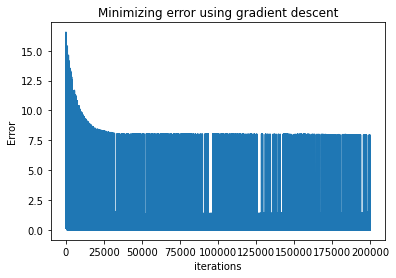

In [16]:
data = pd.read_excel(r'C:\Users\HP\Desktop\realEstate.xlsx')

X = np.array(data.iloc[:,1:6])
Y = np.array(data.iloc[:,7])
m = np.size(Y)

ones = np.ones((m))
X = np.insert(X, 0, ones, axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X[:,0] = 1

def s_gradient_descent(alpha,theta, itr,X,Y,m):
  i = 0
  diff = []
  while(i<itr):
    i = i+1;
    idx = np.random.choice(np.arange(len(X)), 1, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]
    error = (np.matmul(x_sample, theta)-y_sample)
    diff.append(np.sum(error**2)/(2*m))
    grad = np.matmul(np.transpose(x_sample),error)
    theta = theta - alpha*(grad)/m
  return theta,diff
  
alpha = 0.03
itr = 200000

theta = np.array([[0],[0],[0],[0],[0],[0]])
theta_opt,diff = s_gradient_descent(alpha,theta,itr,X,Y,m)
print('theta: ',theta_opt)

itr = np.arange(1,itr+.1,1)
plt.plot(itr,diff)
plt.xlabel('iterations')
plt.ylabel('Error')
plt.title('Minimizing error using gradient descent')
plt.show()

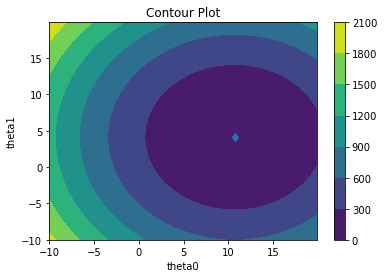

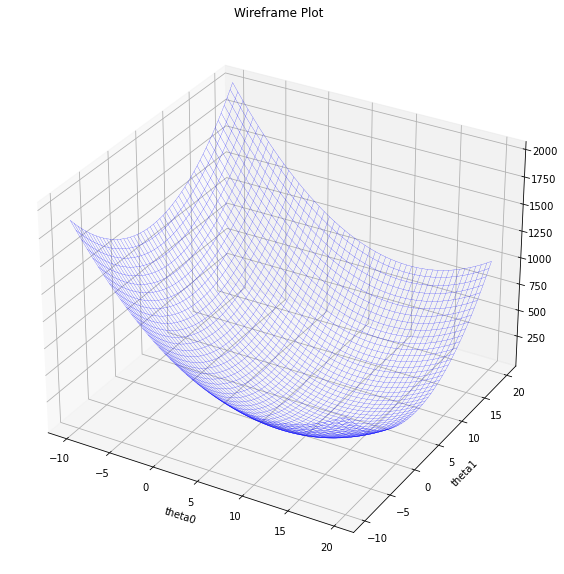

In [17]:
# 5a
x = np.array([[1],[3],[6]])
y = np.array(([6],[10],[16]))
mu = np.mean(x)
sig = np.std(x)
x = (x - mu)/sig
theta0 = np.arange(-10,20,0.1)
theta1 = np.arange(-10,20,0.1)
xx, yy = np.meshgrid(theta0, theta1)
L = np.zeros((np.size(theta1),np.size(theta0)))
for i in range(np.size(theta1)):
    for j in range(np.size(theta0)):
        L[i][j] = np.sum(np.square(y - (theta0[j] + (theta1[i]*x))))
minima = np.argwhere(L == np.min(L))
plt.contourf(xx, yy,L)
plt.colorbar()
plt.plot(theta0[minima[0,1]],theta1[minima[0,0]],'d')
plt.title('Contour Plot')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(xx, yy, L, color='blue', linewidth=0.2)
plt.title('Wireframe Plot')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

the value of theta is: [[10.12986507]
 [ 3.74312252]]


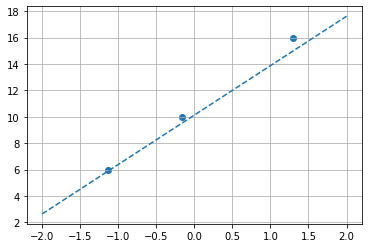

In [18]:
#5b
temp = np.copy(x)
x2 = np.ones((np.size(temp,0),2))
x2[:,1] = temp[:,0]
iterations = 60
alpha = 0.01
theta = np.array([[-10],[-10]])
theta0_vals = [-10]
theta1_vals = [-10]
for i in range(iterations - 1):
 y_hat = np.dot(x2,theta)
 theta = theta - (alpha*2)*np.dot(x2.T,(y_hat - y))
 theta0_vals.append(theta[0,0])
 theta1_vals.append(theta[1,0])
 
print('the value of theta is:',theta)
plt.figure()
axes = plt.gca()
x_val = np.linspace(-2,2,100)
y_val = theta[0,0] + theta[1,0] * x_val
plt.plot(x_val, y_val, '--')
plt.scatter(x, y)
plt.grid()
plt.plot()
plt.show()
#GIF MAKER
filenames = []
for i in range(iterations):
 # plot the line chart
 plt.contourf(xx, yy,L)
 plt.colorbar()
 for j in range(i+1):
  plt.plot(theta0_vals[j],theta1_vals[j],'ro')
 plt.title('Contour Plot')
 plt.xlabel('theta0')
 plt.ylabel('theta1')
 
  # create file name and append it to a list
 filename = f'{i}.png'
 filenames.append(filename)
 
 # save frame
 plt.savefig(filename)
 plt.close()# build gif
 
with imageio.get_writer('Ques5.gif', mode='I') as writer:
 for filename in filenames:
   image = imageio.imread(filename)
   writer.append_data(image)
 
# Remove files
for filename in set(filenames):
 os.remove(filename)